In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten, RandomFlip
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train='/content/drive//content/drive/MyDrive/D&C'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 111.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.8 MB/s eta 0:00:00


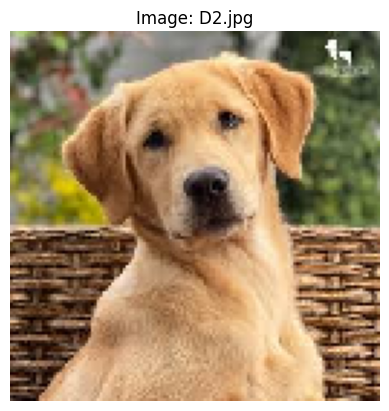

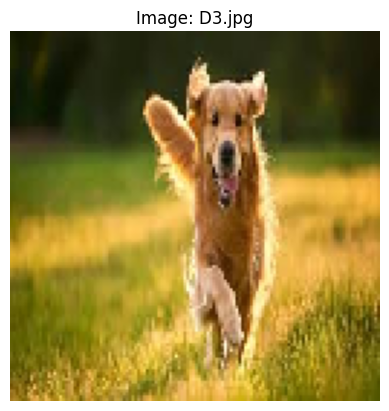

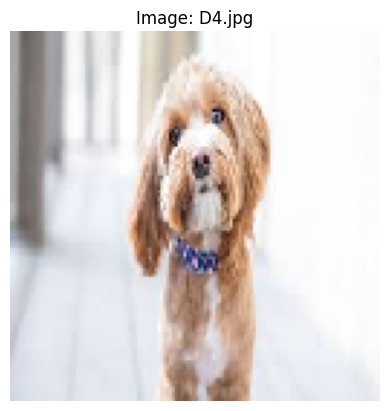

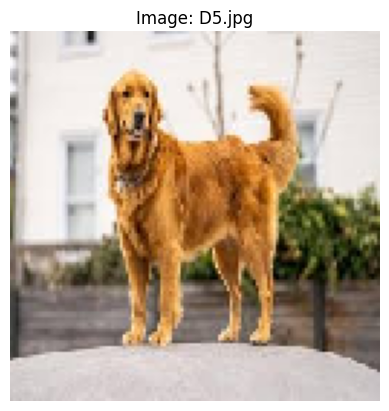

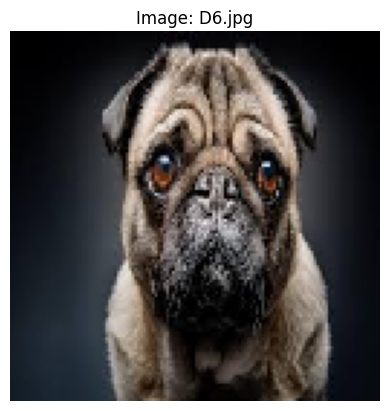

In [6]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Set your folder path
# Corrected the folder path to point directly to the dataset within MyDrive
folder_path='/content/drive/MyDrive/D&C/DOG'
# List image files (jpg/png)
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Show first 5 images
for i in range(min(5, len(image_files))):
    img_path = os.path.join(folder_path, image_files[i])
    img = image.load_img(img_path, target_size=(128, 128))

    plt.imshow(img)
    plt.title(f"Image: {image_files[i]}")
    plt.axis('off')
    plt.show()

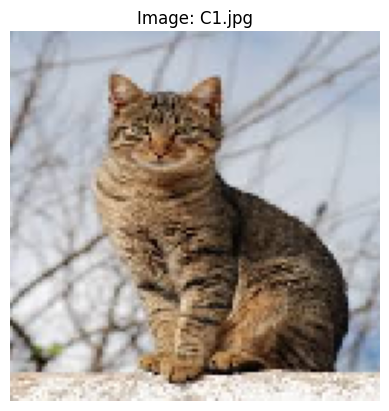

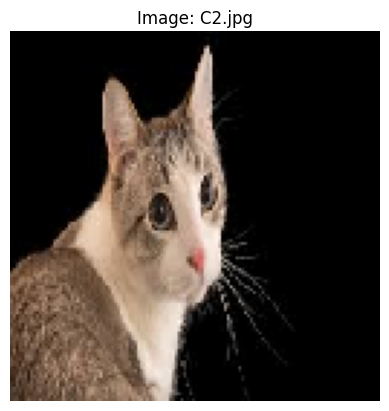

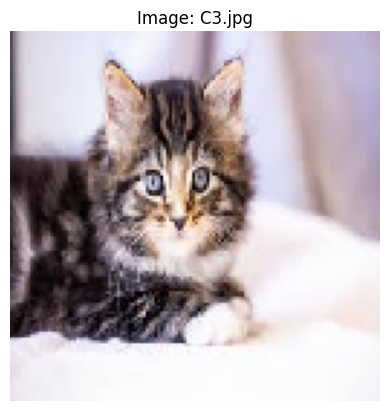

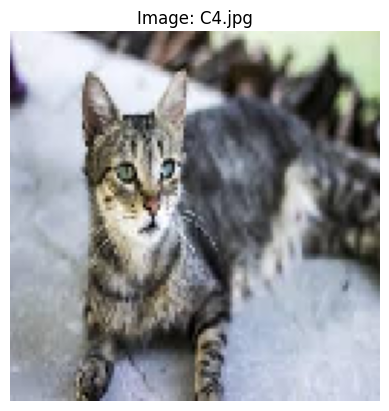

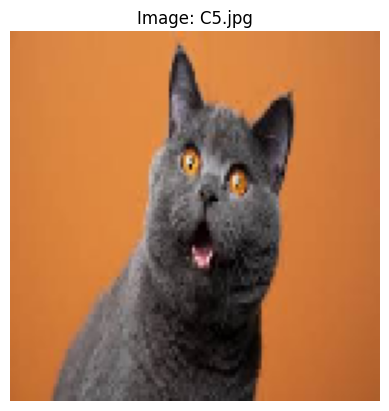

In [7]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Set your folder path
# Corrected the folder path to point directly to the dataset within MyDrive
folder_path='/content/drive/MyDrive/D&C/CAT'
# List image files (jpg/png)
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Show first 5 images
for i in range(min(5, len(image_files))):
    img_path = os.path.join(folder_path, image_files[i])
    img = image.load_img(img_path, target_size=(128, 128))

    plt.imshow(img)
    plt.title(f"Image: {image_files[i]}")
    plt.axis('off')
    plt.show()

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
train_path='/content/drive/MyDrive/D&C/CAT'

In [10]:
import urllib
import zipfile
import os

# Define the filename
zip_filename = "dog and cat Data Set.zip"

# Replace this URL with the actual direct download link to your dataset zip file
# Example: If you made your file public and got a direct download link:
# dataset_url = "https://drive.google.com/uc?export=download&id=YOUR_FILE_ID_HERE"
# You will need to get the correct ID from your Google Drive file.

# **IMPORTANT:** Replace the placeholder URL below with the actual public direct download link
dataset_url = "REPLACE_WITH_YOUR_DATASET_DOWNLOAD_URL" # <--- ***REPLACE THIS LINE***

# Download the dataset if the file doesn't exist or seems too small (optional size check)
if not os.path.isfile(zip_filename) or os.path.getsize(zip_filename) < 1000: # Basic size check
  print(f"Downloading dataset from {dataset_url}...")
  try:
    urllib.request.urlretrieve(dataset_url, zip_filename)
    print(f"Download complete: {zip_filename}")
  except Exception as e:
    print(f"Error during download: {e}")
    # You might want to exit or handle the error appropriately
else:
    print(f"{zip_filename} already exists.")

# Check if the downloaded file is a zip file before attempting to extract
if os.path.isfile(zip_filename):
    try:
        print(f"Attempting to open {zip_filename} as a zip file...")
        with zipfile.ZipFile(zip_filename,"r") as zip_ref:
            print("File is a valid zip file. Extracting...")
            zip_ref.extractall(".")
            print("Extraction complete.")
    except zipfile.BadZipFile:
        print(f"Error: {zip_filename} is not a valid zip file. Please check the download URL.")
    except FileNotFoundError:
         print(f"Error: {zip_filename} not found after download attempt.")
    except Exception as e:
        print(f"An unexpected error occurred during extraction: {e}")
else:
    print(f"Error: {zip_filename} does not exist after download attempt.")

Error during download: unknown url type: 'REPLACE_WITH_YOUR_DATASET_DOWNLOAD_URL'
Error: dog and cat Data Set.zip does not exist after download attempt.


In [11]:
# Paths
base_dir = '/content/drive/MyDrive/D&C'

train_dir = os.path.join(base_dir, "Train")
test_dir = os.path.join(base_dir, "Test")

In [12]:
# file: ipython-input-12-b427a9758eae
import urllib
import zipfile
import os

# Define the filename
zip_filename = "dog and cat Data Set.zip"

# Replace this URL with the actual direct download link to your dataset zip file
# Example: If you made your file public and got a direct download link:
# dataset_url = "https://drive.google.com/uc?export=download&id=YOUR_FILE_ID_HERE"
# You will need to get the correct ID from your Google Drive file.

# **IMPORTANT:** Replace the placeholder URL below with the actual public direct download link
# MAKE SURE THIS IS A PUBLIC DIRECT DOWNLOAD LINK, NOT THE SHARED LINK FROM DRIVE UI
dataset_url = "REPLACE_WITH_YOUR_DATASET_DOWNLOAD_URL" # <--- ***REPLACE THIS LINE***

# --- Added checks to verify download and extraction ---
download_successful = False

# Download the dataset if the file doesn't exist or seems too small (optional size check)
if not os.path.isfile(zip_filename) or os.path.getsize(zip_filename) < 1000: # Basic size check
  print(f"Downloading dataset from {dataset_url}...")
  try:
    urllib.request.urlretrieve(dataset_url, zip_filename)
    print(f"Download complete: {zip_filename}")
    download_successful = True
  except Exception as e:
    print(f"Error during download: {e}")
    # You might want to exit or handle the error appropriately
else:
    print(f"{zip_filename} already exists.")
    # Assume successful download if file already exists and meets basic size check
    if os.path.isfile(zip_filename) and os.path.getsize(zip_filename) >= 1000:
         download_successful = True


# Check if the downloaded file is a zip file before attempting to extract
if download_successful and os.path.isfile(zip_filename):
    try:
        print(f"Attempting to open {zip_filename} as a zip file...")
        with zipfile.ZipFile(zip_filename,"r") as zip_ref:
            print("File is a valid zip file. Extracting...")
            # Check the contents of the zip file before extracting
            print("Zip file contents:")
            for file_info in zip_ref.infolist():
                print(file_info.filename)
            zip_ref.extractall(".")
            print("Extraction complete.")
    except zipfile.BadZipFile:
        print(f"Error: {zip_filename} is not a valid zip file. Please check the download URL.")
    except FileNotFoundError:
         print(f"Error: {zip_filename} not found after download attempt.")
    except Exception as e:
        print(f"An unexpected error occurred during extraction: {e}")
else:
    print(f"Error: {zip_filename} does not exist or download failed.")


# file: ipython-input-13-b427a9758eae
# Paths
# Assuming extraction happened to the current directory ('.')
# So the base directory will be /content/dog and cat if the zip contains that folder
base_dir_extracted = '/content/dog and cat' # <--- Corrected based on extraction to '.'

# Verify that the expected base directory exists after extraction
if not os.path.isdir(base_dir_extracted):
    print(f"Error: Extracted base directory not found: {base_dir_extracted}")
    print("Please check the structure of your zip file and the extraction location.")
    # You might want to exit or handle this error
    # Example: os._exit(1)

train_dir = os.path.join(base_dir_extracted, "Train")
test_dir = os.path.join(base_dir_extracted, "Test")

# --- Added checks for train and test directories ---
if not os.path.isdir(train_dir):
    print(f"Error: Training directory not found: {train_dir}")
    print("Please ensure the zip file extracts a structure like 'dog and cat/Train' and 'dog and cat/Test'.")
    # os._exit(1) # Consider exiting if critical directories are missing

if not os.path.isdir(test_dir):
    print(f"Error: Test directory not found: {test_dir}")
    print("Please ensure the zip file extracts a structure like 'dog and cat/Train' and 'dog and cat/Test'.")
    # os._exit(1) # Consider exiting if critical directories are missing


# file: ipython-input-14-b427a9758eae
# Image settings
img_size = (150, 150)
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, shear_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Only attempt to create generators if directories exist
if os.path.isdir(train_dir) and os.path.isdir(test_dir):
    print(f"Found training directory: {train_dir}")
    print(f"Found test directory: {test_dir}")

    train_data = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary'
    )

    test_data = test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary'
    )
else:
    print("Skipping data generator creation due to missing directories.")


Error during download: unknown url type: 'REPLACE_WITH_YOUR_DATASET_DOWNLOAD_URL'
Error: dog and cat Data Set.zip does not exist or download failed.
Error: Extracted base directory not found: /content/dog and cat
Please check the structure of your zip file and the extraction location.
Error: Training directory not found: /content/dog and cat/Train
Please ensure the zip file extracts a structure like 'dog and cat/Train' and 'dog and cat/Test'.
Error: Test directory not found: /content/dog and cat/Test
Please ensure the zip file extracts a structure like 'dog and cat/Train' and 'dog and cat/Test'.
Skipping data generator creation due to missing directories.


In [13]:
# file: ipython-input-12-b427a9758eae
import urllib
import zipfile
import os

# Define the filename
zip_filename = "dog and cat Data Set.zip"

# Replace this URL with the actual direct download link to your dataset zip file
# Example: If you made your file public and got a direct download link:
# dataset_url = "https://drive.google.com/uc?export=download&id=YOUR_FILE_ID_HERE"
# You will need to get the correct ID from your Google Drive file.

# **IMPORTANT:** Replace the placeholder URL below with the actual public direct download link
# MAKE SURE THIS IS A PUBLIC DIRECT DOWNLOAD LINK, NOT THE SHARED LINK FROM DRIVE UI
dataset_url = "REPLACE_WITH_YOUR_DATASET_DOWNLOAD_URL" # <--- ***REPLACE THIS LINE***

# --- Added checks to verify download and extraction ---
download_successful = False

# Download the dataset if the file doesn't exist or seems too small (optional size check)
if not os.path.isfile(zip_filename) or os.path.getsize(zip_filename) < 1000: # Basic size check
  print(f"Downloading dataset from {dataset_url}...")
  try:
    urllib.request.urlretrieve(dataset_url, zip_filename)
    print(f"Download complete: {zip_filename}")
    download_successful = True
  except Exception as e:
    print(f"Error during download: {e}")
    # You might want to exit or handle the error appropriately
else:
    print(f"{zip_filename} already exists.")
    # Assume successful download if file already exists and meets basic size check
    if os.path.isfile(zip_filename) and os.path.getsize(zip_filename) >= 1000:
         download_successful = True


# Check if the downloaded file is a zip file before attempting to extract
if download_successful and os.path.isfile(zip_filename):
    try:
        print(f"Attempting to open {zip_filename} as a zip file...")
        with zipfile.ZipFile(zip_filename,"r") as zip_ref:
            print("File is a valid zip file. Extracting...")
            # Check the contents of the zip file before extracting
            print("Zip file contents:")
            for file_info in zip_ref.infolist():
                print(file_info.filename)
            zip_ref.extractall(".")
            print("Extraction complete.")
    except zipfile.BadZipFile:
        print(f"Error: {zip_filename} is not a valid zip file. Please check the download URL.")
    except FileNotFoundError:
         print(f"Error: {zip_filename} not found after download attempt.")
    except Exception as e:
        print(f"An unexpected error occurred during extraction: {e}")
else:
    print(f"Error: {zip_filename} does not exist or download failed.")


# file: ipython-input-13-b427a9758eae
# Paths
# Assuming extraction happened to the current directory ('.')
# So the base directory will be /content/dog and cat if the zip contains that folder
base_dir_extracted = '/content/dog and cat' # <--- Corrected based on extraction to '.'

# Verify that the expected base directory exists after extraction
if not os.path.isdir(base_dir_extracted):
    print(f"Error: Extracted base directory not found: {base_dir_extracted}")
    print("Please check the structure of your zip file and the extraction location.")
    # You might want to exit or handle this error
    # Example: os._exit(1)

train_dir = os.path.join(base_dir_extracted, "Train")
test_dir = os.path.join(base_dir_extracted, "Test")

# --- Added checks for train and test directories ---
if not os.path.isdir(train_dir):
    print(f"Error: Training directory not found: {train_dir}")
    print("Please ensure the zip file extracts a structure like 'dog and cat/Train' and 'dog and cat/Test'.")
    # os._exit(1) # Consider exiting if critical directories are missing

if not os.path.isdir(test_dir):
    print(f"Error: Test directory not found: {test_dir}")
    print("Please ensure the zip file extracts a structure like 'dog and cat/Train' and 'dog and cat/Test'.")
    # os._exit(1) # Consider exiting if critical directories are missing


# file: ipython-input-14-b427a9758eae
# Image settings
img_size = (150, 150)
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, shear_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Only attempt to create generators if directories exist
if os.path.isdir(train_dir) and os.path.isdir(test_dir):
    print(f"Found training directory: {train_dir}")
    print(f"Found test directory: {test_dir}")

    train_data = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary'
    )

    test_data = test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary'
    )
else:
    print("Skipping data generator creation due to missing directories.")


Error during download: unknown url type: 'REPLACE_WITH_YOUR_DATASET_DOWNLOAD_URL'
Error: dog and cat Data Set.zip does not exist or download failed.
Error: Extracted base directory not found: /content/dog and cat
Please check the structure of your zip file and the extraction location.
Error: Training directory not found: /content/dog and cat/Train
Please ensure the zip file extracts a structure like 'dog and cat/Train' and 'dog and cat/Test'.
Error: Test directory not found: /content/dog and cat/Test
Please ensure the zip file extracts a structure like 'dog and cat/Train' and 'dog and cat/Test'.
Skipping data generator creation due to missing directories.


In [14]:
# file: ipython-input-19-75c3a9cf7ecd

# Evaluate
# Check if test_data was created in the previous cell
if 'test_data' in locals() and test_data is not None:
    print("Evaluating model...")
    loss, accuracy = model.evaluate(test_data)
    print(f"Test Accuracy: {accuracy*100:.2f}%")

    # Save model
    # Ensure the directory for saving the model exists if it's a different path
    model_save_path = "dag and cad_cnn_model.h5" # Or a full path like '/content/drive/MyDrive/dag and cad_cnn_model.h5'
    try:
        model.save(model_save_path)
        print(f"Model saved successfully to {model_save_path}")
    except Exception as e:
        print(f"Error saving model: {e}")
        print("Please check the save path and file permissions.")

else:
    print("Skipping model evaluation and saving because 'test_data' was not created.")
    print("Please check the previous cells to ensure the dataset was downloaded and extracted correctly,")
    print("and that the 'Train' and 'Test' directories exist at the expected path.")


Skipping model evaluation and saving because 'test_data' was not created.
Please check the previous cells to ensure the dataset was downloaded and extracted correctly,
and that the 'Train' and 'Test' directories exist at the expected path.


In [15]:
# file: ipython-input-15-xxxxxxx (New cell)
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid') # Use 'sigmoid' for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

# Print model summary to confirm it's defined
model.summary()

# (Optional) Train the model - Add this only if you intend to train the model
# history = model.fit(
#     train_data,
#     steps_per_epoch=train_data.samples // batch_size,
#     epochs=10, # Adjust the number of epochs as needed
#     validation_data=test_data,
#     validation_steps=test_data.samples // batch_size
# )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.2 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# If running in Google Colab, uncomment the following two lines:
# from google.colab import drive
# drive.mount('/content/drive')

# Load the trained model
try:
    model = tf.keras.models.load_model('/content/drive/MyDrive/dataset/dog and cat_cnn_model.h5')
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Please check the model path and file format.")
    # You might want to exit or raise here if model loading fails

def predict_tumor(img):
    # Resize and preprocess the image
    img = img.resize((150, 150))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict with the model
    prediction = model.predict(img_array)

    # Debug prints
    print("Raw model prediction:", prediction)
    print("Prediction shape:", prediction.shape)

    # Handle output shapes
    if prediction.shape == (1, 1):
        prediction_value = prediction[0][0]
        label = "dog" if prediction_value > 0.5 else "cat"
        confidence = prediction_value if prediction_value > 0.5 else 1 - prediction_value
    elif prediction.shape == (1, 2):
        prediction_value = prediction[0][1]
        label = "dog" if prediction_value > 0.5 else "cat"
        confidence = prediction_value if prediction_value > 0.5 else 1 - prediction_value
    else:
        print(f"Warning: Unexpected model output shape: {prediction.shape}")
        label = "cat"
        confidence = 1.0

    return f"{label} (confidence: {confidence:.2f})"

# Gradio Interface
interface = gr.Interface(
    fn=predict_tumor,
    inputs=gr.Image(type="pil"),
    outputs=gr.Text(label="Prediction"),
    title="Dog vs Cat Detector",
    description="Upload an image to classify it as a dog or a cat."
)

# Launch with debug=True for detailed errors in browser console
interface.launch(debug=True)


Error loading model: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/dataset/dog and cat_cnn_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Please check the model path and file format.
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://32dedf990d8aee4878.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
Raw model prediction: [[0.5111415]]
Prediction shape: (1, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Raw model prediction: [[0.5111415]]
Prediction shape: (1, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Raw model prediction: [[0.5140199]]
Prediction shape: (1, 1)
